## Data Visualization

In this checkpoint you will be using a FIFA dataset of soccer player statistics to create a visualization, then also interpreting a visualization we have created.

First, we import the relevant libraries

In [6]:
# Run this cell without changes
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next, we read data from a CSV and create `player_nationalities`, a list of dictionaries containing data about the number of FIFA soccer players from each country.  The countries are in random order.

This code also prints the first five dictionaries in `player_nationalities`, out of a total of 161

In [7]:
# Run this cell without changes
player_nationalities = []
with open("data/player_nationalities.csv") as f:
    for row in csv.DictReader(f):
        row['count_of_players'] = int(row['count_of_players'])
        player_nationalities.append(dict(row))

for index in range(5):
    print(player_nationalities[index])

{'country': 'Afghanistan', 'count_of_players': 4}
{'country': 'Croatia', 'count_of_players': 113}
{'country': 'Benin', 'count_of_players': 15}
{'country': 'Azerbaijan', 'count_of_players': 5}
{'country': 'Montenegro', 'count_of_players': 20}


### 1a) Find the top 10 countries with the most players. 

Your final result should be:

- A list made up of the elements of `player_nationalities`
- Which is sorted so that the `dict` with the highest `count_of_players` is the first element, the second-highest is the second element, etc
- The list has 10 elements in it

**Assign this list to the variable name `top10`**


In [179]:
### BEGIN SOLUTION


from test_scripts.test_class import Test
test = Test()

ordered = sorted(player_nationalities, key=lambda x: x['count_of_players'], reverse=True)
top10 = ordered[:10]
top10

test.save(len(top10), 'len_top10')
test.save(top10, 'top10')
test.save(top10[0], 'top10_first')
test.save(top10[-1], 'top10_last')
test.save(top10[4], 'top10_middle')



### END SOLUTION

In [180]:
### BEGIN HIDDEN TESTS

assert len(top10) == 10, "Looks like your top10 variable is assigned incorrectly?"

test.run_test(len(top10), 
              'len_top10',
              "Looks like your list doesn't have 10 elements in it?"
             )

test.run_test(top10[0],
              'top10_first',
              "Looks like your first element isn't {'country': 'England', 'count_of_players': 1475}?"
)

test.run_test(top10[-1],
              'top10_last',
              "Looks like your last element isn't {'country': 'Netherlands', 'count_of_players': 426}?"
             )

test.run_test(top10[4], 
              'top10_middle',
              "Looks like your fifth element isn't Bruce Willis or {'country': 'Argentina', 'count_of_players': 833}?"
             )


### END HIDDEN TESTS

### 1b) Create a bar chart showing the number of players in those 10 countries

- Use the `fig` and `ax` method, *not* `plt.bar()`
- Display the bars tallest to shortest
- Add the title `10 Countries with the Most Players`
- Add the y-axis label `Number of Players`

A recommended figsize is (10, 6)

If you are unable to find the top 10 countries but want the chance to demonstrate your plotting skills use the first 10 randomly ordered countries: `top10 = player_nationalities[:10]`

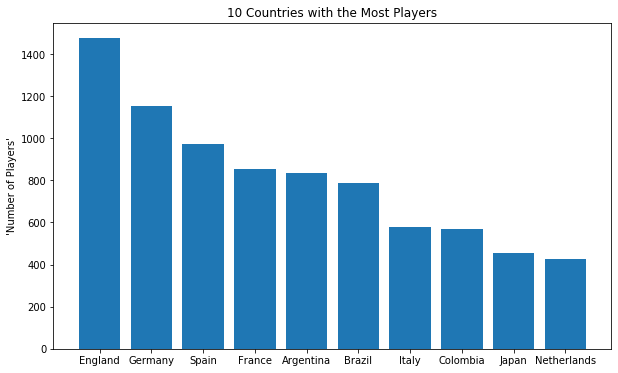

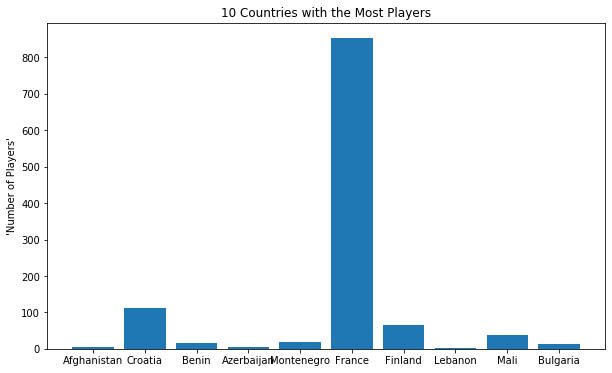

In [181]:
### BEGIN SOLUTION

def plotfig():
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_title("10 Countries with the Most Players")
    ax.set_ylabel("'Number of Players'")

    labels = [row['country'] for row in top10]
    values = [row['count_of_players'] for row in top10]
    ax.bar(labels, values)
    plt.show();
    
    return fig, ax

fig, ax = plotfig()

test.save(ax.get_xticklabels()[0].get_text(), 'xtick_largest')
test.save(ax.get_xticklabels()[9].get_text(), 'xtick_smallest')
test.save(ax.get_title(), 'title')
test.save(ax.get_ylabel(), 'y_label')

top10 = player_nationalities[:10]

fig, ax = plotfig()

test.save(ax.get_xticklabels()[0].get_text(), 'alt_xtick_largest')
test.save(ax.get_xticklabels()[9].get_text(), 'alt_xtick_smallest')
test.save(ax.get_title(), 'alt_title')
test.save(ax.get_ylabel(), 'alt_y_label')

### END SOLUTION

In [183]:
### BEGIN HIDDEN TESTS

if ax == None:
    raise AssertionError ("Looks like the ax object was used incorrectly?")

if ax.get_xticklabels()[0].get_text() == 'England':


    test.run_test(ax.get_xticklabels()[0].get_text(), 
                  'xtick_largest',
                  "Looks like England wasn't the first bar?"
                 )

    test.run_test(ax.get_xticklabels()[9].get_text(), 
                  'xtick_smallest',
                  "Looks like Netherlands wasn't the last bar?"
                 )

    test.run_test(ax.get_title(), 
                  'title', 
                  "Looks like the title wasn't '10 Countries with the Most Players'?"
                 )

    test.run_test(ax.get_ylabel(), 
                  'y_label', 
                  "Looks like the y-axis wasn't 'Number of Players'?"
                 )

elif ax.get_xticklabels()[0].get_text() == 'Afghanistan':

    test.run_test(ax.get_xticklabels()[0].get_text(), 
                  'alt_xtick_largest',
                  "Looks like Afghanistan wasn't the first bar?"
                 )

    test.run_test(ax.get_xticklabels()[9].get_text(), 
                  'alt_xtick_smallest',
                  "Looks like Bulgaria wasn't the last bar?"
                 )

    test.run_test(ax.get_title(), 
                  'alt_title', 
                  "Looks like the title wasn't '10 Countries with the Most Players'?"
                 )
    test.run_test(ax.get_ylabel(), 
                  'alt_y_label', 
                  "Looks like the y-axis wasn't 'Number of Players'?"
                 )

else:
    raise AssertionError ("Looks like the plot was incorrect?")

### END HIDDEN TESTS

**2) Below is code for a scatter plot for the player stats `Standing Tackle` and `Sliding Tackle`**

In [184]:
# Run this cell without changes
player_stats = []
with open("data/player_stats.csv") as f:
    for row in csv.DictReader(f):
        row["standing_tackle"] = float(row["standing_tackle"])
        row["sliding_tackle"] = float(row["sliding_tackle"])
        player_stats.append(dict(row))
        
for index in range(5):
    print(player_stats[index])

{'standing_tackle': 28.0, 'sliding_tackle': 26.0}
{'standing_tackle': 31.0, 'sliding_tackle': 23.0}
{'standing_tackle': 24.0, 'sliding_tackle': 33.0}
{'standing_tackle': 21.0, 'sliding_tackle': 13.0}
{'standing_tackle': 58.0, 'sliding_tackle': 51.0}


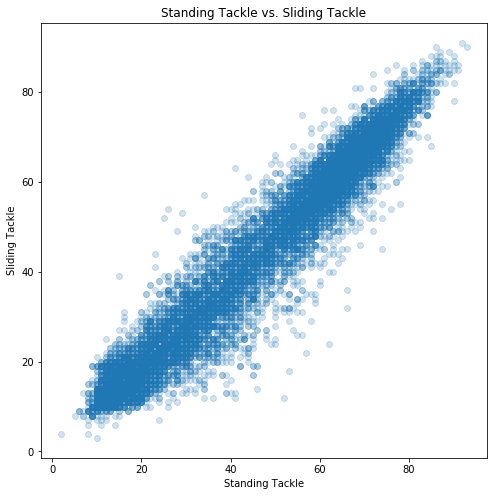

In [185]:
# Run this cell without changes
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_title('Standing Tackle vs. Sliding Tackle')
ax.set_xlabel('Standing Tackle')
ax.set_ylabel('Sliding Tackle')

x = [row["standing_tackle"] for row in player_stats]
y = [row["sliding_tackle"] for row in player_stats]

ax.scatter(x, y, alpha=0.2);

**How would you describe the relationship between these two features?**

=== BEGIN MARK SCHEME ===

'''These two features are highly correlated.'''

=== END MARK SCHEME ===